In [1]:
import pandas as pd
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from crimebb import *

In [3]:
DATA_PATH="../data/"
CSV_PATH = f"{DATA_PATH}csv/"

### Exploring data

#### members

In [4]:
members_df = pd.read_csv(f"{CSV_PATH}members.csv", sep=",", low_memory=False)
members_df.drop_duplicates(inplace=True)
members_df

,id,username,site_id,profile_url,homepage_url,avatar_url,registration_date,age,signature,location,...,last_visit,total_posts,first_post_on,last_post_on,reputation,prestige,is_parsed,other_info,db_created_on,db_updated_on
0,166130,troinik,10,https://forum.antichat.ru/members/166130/,NONE,https://forum.antichat.ru/data/avatars/l/166/1...,1899-12-31 20:53:32-03:06:28,0.0,NONE,NONE,...,2012-06-05 12:07:00-03,0.0,2011-08-26 05:00:00-03,2012-02-23 08:06:00-02,0.0,0.0,t,NaN,2020-12-19 21:33:21.531429-03,2020-12-19 21:33:21.531429-03
1,29019,swf,10,https://forum.antichat.ru/members/29019/,NONE,https://forum.antichat.ru/styles/uix_dark/xenf...,1899-12-31 20:53:32-03:06:28,0.0,NONE,NONE,...,2006-11-22 21:10:00-02,10.0,2006-11-05 14:05:00-02,2006-11-19 15:42:00-02,0.0,0.0,t,NaN,2020-12-19 21:36:07.512047-03,2020-12-19 21:36:07.512047-03
2,33866,slesh,10,https://forum.antichat.ru/members/33866/,NONE,https://forum.antichat.ru/data/avatars/l/33/33...,1899-12-31 20:53:32-03:06:28,0.0,"Если тебе что-то не нужно, то это не значит, ч...",\\Device\Ip,...,2018-08-02 12:17:00-03,2702.0,2007-03-05 07:50:00-03,2016-09-09 01:56:00-03,455.0,0.0,t,NaN,2020-12-19 21:37:38.243866-03,2020-12-19 21:37:38.243866-03
3,131527,vipnet,10,https://forum.antichat.ru/members/131527/,NONE,https://forum.antichat.ru/styles/uix_dark/xenf...,1899-12-31 20:53:32-03:06:28,0.0,NONE,NONE,...,2010-08-15 21:12:00-03,4.0,2010-07-17 15:49:00-03,2010-07-17 15:49:00-03,0.0,0.0,t,NaN,2020-12-19 21:36:07.521053-03,2020-12-19 21:36:07.521053-03
4,88822,sm3rch,10,https://forum.antichat.ru/members/88822/,NONE,https://forum.antichat.ru/styles/uix_dark/xenf...,1899-12-31 20:53:32-03:06:28,0.0,NONE,NONE,...,2010-06-21 14:45:00-03,4.0,2009-06-21 13:53:00-03,2010-02-24 08:08:00-03,0.0,0.0,t,NaN,2020-12-19 21:36:25.920977-03,2020-12-19 21:36:25.920977-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219149,3818,Mrsirman12,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,2019-08-07 09:38:59.732928-03,2019-08-07 09:38:59.732928-03
219150,19432,Winback,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,2019-08-07 09:49:29.902389-03,2019-08-07 09:49:29.902389-03
219151,2300,a-i-c,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,2019-08-07 09:45:06.792333-03,2019-08-07 09:45:06.792333-03
219152,2279,blackhorse999,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,2019-08-07 09:45:08.170754-03,2019-08-07 09:45:08.170754-03


In [18]:
members_df.loc[1,:]

id                                                               29019
username                                                           swf
site_id                                                             10
profile_url                   https://forum.antichat.ru/members/29019/
homepage_url                                                      NONE
avatar_url           https://forum.antichat.ru/styles/uix_dark/xenf...
registration_date                         1899-12-31 20:53:32-03:06:28
age                                                                0.0
signature                                                         NONE
location                                                          NONE
location_time                             1899-12-31 20:53:32-03:06:28
time_spent                                                         0.0
last_visit                                      2006-11-22 21:10:00-02
total_posts                                                       10.0
first_

##### Age

In [21]:
members_df["age"].value_counts()

0.0    209897
Name: age, dtype: int64

#### site x usermane

In [5]:
site_users_df = pd.pivot_table(members_df,
                 index=["site_id"],
                 values=["username"],
                 aggfunc={
                     "username":len
                 }
                ).sort_values(by="site_id", ascending=False).reset_index(level=0)
site_users_df

,site_id,username
0,24,17343
1,23,2516
2,21,364
3,20,3835
4,19,52406
5,13,7471
6,12,46111
7,10,79887
8,7,881
9,2,8340


#### boards

In [6]:
boards_df = pd.read_csv(f"{CSV_PATH}boards.csv", sep=",", low_memory=False)
boards_df["site_name"] = boards_df["url"].apply(lambda x: (x.replace("https://", "")).split("/")[0] if "https" in x else (x.replace("http://", "")).split("/")[0] )
boards_df.drop_duplicates(inplace=True)
boards_df

,id,site_id,name,url,db_created_on,db_updated_on,site_name
0,24,10,"С/С++, C#, Delphi, .NET, Asm",https://forum.antichat.ru/forums/24/page-356,2020-12-19 17:09:08.887601-03,2020-12-19 17:09:08.887601-03,forum.antichat.ru
1,145,10,Хостинги - Hostings,https://antichat.com/forumdisplay.php?f=145pag...,2020-12-19 17:09:08.895632-03,2020-12-19 17:09:08.895632-03,antichat.com
2,150,10,"Мобильная связь, СМС - Покупка, продажа",https://forum.antichat.ru/forums/150/page-266,2020-12-19 17:09:08.931912-03,2020-12-19 17:09:08.931912-03,forum.antichat.ru
3,157,10,"Услуги, Покупка и Продажа в SEO",https://forum.antichat.ru/link-forums/157/page-2,2020-12-19 17:09:08.991152-03,2020-12-19 17:09:08.991152-03,forum.antichat.ru
4,30,10,Статьи,https://antichat.com/forumdisplay.php?f=30page-72,2020-12-19 17:09:08.995168-03,2020-12-19 17:09:08.995168-03,antichat.com
...,...,...,...,...,...,...,...
893,32,20,Networking / Wireless,http://torum6uvof666pzw.onion/viewforum.php?f=...,2020-12-19 17:09:13.786965-03,2020-12-19 17:09:13.786965-03,torum6uvof666pzw.onion
894,24,20,Website Pentesting,http://torum6uvof666pzw.onion/viewforum.php?f=...,2020-12-19 17:09:13.790779-03,2020-12-19 17:09:13.790779-03,torum6uvof666pzw.onion
895,29,20,Operating Systems,http://torum6uvof666pzw.onion/viewforum.php?f=...,2020-12-19 17:09:13.798825-03,2020-12-19 17:09:13.798825-03,torum6uvof666pzw.onion
896,60,20,Challenges,http://torum6uvof666pzw.onion/viewforum.php?f=...,2020-12-19 17:09:13.81477-03,2020-12-19 17:09:13.81477-03,torum6uvof666pzw.onion


#### Getting names

In [7]:
temp_df = pd.merge(site_users_df, boards_df[["site_id", "site_name"]], on="site_id", how="left").drop_duplicates().sort_values(by="username")
temp_df.set_index('site_name', inplace=True)

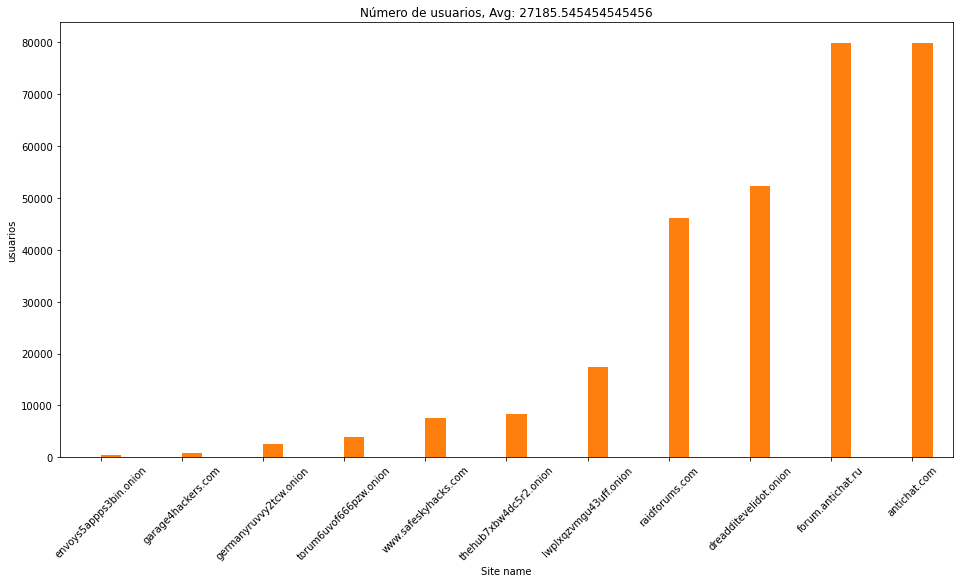

In [8]:
mean_val = temp_df["username"].mean()

ax = temp_df.plot(kind="bar", figsize=(16,8), title=f"Número de usuarios, Avg: {mean_val}", xlabel="Site name", ylabel="usuarios", rot=45)
# ax.legend(list(temp_df["site_name"]))
ax.get_legend().remove()

In [ ]:
site_users_df = pd.pivot_table(members_df,
                 index=["site_id"],
                 values=["username"],
                 aggfunc={
                     "username":len
                 }
                ).sort_values(by="site_id", ascending=False).reset_index(level=0)
site_users_df

#### contracts

In [9]:
contracts_df = pd.read_csv(f"{CSV_PATH}contracts.csv", sep=",", low_memory=False)
contracts_df.drop_duplicates(inplace=True)
contracts_df

,id,site_id,board_id,type,maker,maker_id,accepter,accepter_id,started_date,completed_date,...,maker_payment_info,accepter_payment_info,term,is_maker_complete,is_accepter_complele,maker_rating,accepter_rating,db_created_on,db_updated_on,html_source


#### Threads

In [10]:
threads_df = pd.read_csv(f"{CSV_PATH}threads.csv", sep=",", low_memory=False)
threads_df.drop_duplicates(inplace=True)
threads_df

,id,site_id,board_id,creator,creator_id,label,name,url,created_on,last_post_on,is_forward_direction,db_created_on,db_updated_on
0,473570,10,23,dbagrov,342815,NaN,ФСБ видит угрозу в защищённых мессенджерах и а...,https://forum.antichat.ru/threads/473570/,2019-10-24 12:09:03.149923-03,NaN,t,2019-10-24 12:09:03.149923-03,2019-10-24 12:09:03.149923-03
1,472702,10,23,Dark_shadow,335846,NaN,Эксперт Google: Вредоносные сайты атаковали по...,https://forum.antichat.ru/threads/472702/,2019-10-24 12:09:29.163386-03,NaN,t,2019-10-24 12:09:29.163386-03,2019-10-24 12:09:29.163386-03
2,473412,10,23,littlebig000,327300,NaN,Ирак полностью отключил интернет в стране,https://forum.antichat.ru/threads/473412/,2019-10-24 12:09:05.359046-03,NaN,t,2019-10-24 12:09:05.359046-03,2019-10-24 12:09:05.359046-03
3,472675,10,23,Alienplan,335505,NaN,[ВОЗМОЖНО] СОРМ расшифровывает HTTPS трафик к ...,https://forum.antichat.ru/threads/472675/,2019-10-24 12:09:29.64036-03,NaN,t,2019-10-24 12:09:29.64036-03,2019-10-24 12:09:29.64036-03
4,473059,10,23,010101Hex,327986,NaN,Обвиняемый во взломе JP Morgan Chase россиянин...,https://forum.antichat.ru/threads/473059/,2019-10-24 12:09:18.955105-03,NaN,t,2019-10-24 12:09:18.955105-03,2019-10-24 12:09:18.955105-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405178,4450,20,62,variable6754,11470,NaN,Working dark net market places,http://torum6uvof666pzw.onion/viewtopic.php?f=...,2019-08-07 12:07:39.79638-03,NaN,t,2019-08-07 12:07:39.79638-03,2019-08-07 12:07:39.79638-03
405179,4495,20,62,WrecklessRush,10707,NaN,Need Empire market mirror link,http://torum6uvof666pzw.onion/viewtopic.php?f=...,2019-08-07 12:07:16.971569-03,NaN,t,2019-08-07 12:07:16.971569-03,2019-08-07 12:07:16.971569-03
405180,4182,20,62,8634534634543,10256,NaN,Discovering A Legitimate Online Hacking Service,http://torum6uvof666pzw.onion/viewtopic.php?f=...,2019-08-07 12:09:41.136812-03,NaN,t,2019-08-07 12:09:41.136812-03,2019-08-07 12:09:41.136812-03
405181,3848,20,62,AXDZ,9220,NaN,best market,http://torum6uvof666pzw.onion/viewtopic.php?f=...,2019-08-07 12:09:52.858637-03,NaN,t,2019-08-07 12:09:52.858637-03,2019-08-07 12:09:52.858637-03


#### Posts

In [11]:
posts_df = pd.read_csv(f"{CSV_PATH}posts.csv", sep=",", low_memory=False)
posts_df.drop_duplicates(inplace=True)
posts_df

,id,site_id,board_id,thread_id,creator,creator_id,creator_n_posts,creator_reputation,content,quoted_post_ids,is_a_reply,created_on,updated_on,db_created_on,db_updated_on
0,34,10,114,9,Algol,1174,1761,0,Адрес хоть дай...Первый раз слышу о таком ...,{},t,2002-05-31 06:36:00-03,2002-05-31 06:36:00-03,2018-08-09 07:00:01.49295-03,2018-08-09 07:00:01.49295-03
1,637,10,114,113,Algol,1174,1761,0,Кстати этот чат ломается ...,{},t,2002-08-05 16:15:00-03,2002-08-05 16:15:00-03,2018-08-09 07:37:07.560054-03,2018-08-09 07:37:07.560054-03
2,710,10,114,137,Algol,1174,1761,0,Чесно говоря это действительно большая редкост...,{},t,2002-08-12 08:08:00-03,2002-08-12 08:08:00-03,2018-07-24 07:52:47.343128-03,2018-07-24 07:52:47.343128-03
3,491,10,114,99,GPT cd-r74xl 24x,1548,1,0,"Сорри, этт я неправильно указал ихний адрес. И...",{},t,2002-07-19 09:30:00-03,2002-07-19 09:30:00-03,2018-08-09 07:41:59.0352-03,2018-08-09 07:41:59.0352-03
4,571,10,46,120,iRedX,1968,123,9,Скоро будет обновление,{},t,2002-07-31 23:01:00-03,2002-07-31 23:01:00-03,2018-08-24 00:04:14.725101-03,2018-08-24 00:04:14.725101-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373784,42116,20,49,8611,tolerance2,24965,14,0,What is that? I dont have javascript enabled s...,{},t,2019-08-06 21:00:00-03,2019-08-06 21:00:00-03,2019-08-07 11:31:06.366889-03,2019-08-07 11:31:06.366889-03
3373785,42124,20,62,8454,mrkcuf,22583,52,0,***LINK***lovelycloud[./memberlist.php?mode=vi...,{},t,2019-08-06 21:00:00-03,2019-08-06 21:00:00-03,2019-08-07 11:31:12.303321-03,2019-08-07 11:31:12.303321-03
3373786,42129,20,62,8454,rIA,15407,27,0,I wrote some keyloggers for android if you are...,{},t,2019-08-06 21:00:00-03,2019-08-06 21:00:00-03,2019-08-07 11:31:14.486686-03,2019-08-07 11:31:14.486686-03
3373787,42134,20,62,8454,lovelycloud,25064,7,0,ok..,{},t,2019-08-06 21:00:00-03,2019-08-06 21:00:00-03,2019-08-07 11:31:14.379742-03,2019-08-07 11:31:14.379742-03


#### votes

In [12]:
votes_df = pd.read_csv(f"{CSV_PATH}votes.csv", sep=",", low_memory=False)
votes_df.drop_duplicates(inplace=True)
votes_df

,id,site_id,donor_id,receiver_id,quantity,reason,created_on,db_created_on,db_updated_on
0,13415,12,7,121391372,5,Daddy Issues,2018-03-06 23:23:00-03,2020-12-20 12:48:42.666276-03,2020-12-20 12:48:42.666276-03
1,14022,12,121316517,121388126,1,10/3 would bang,2015-11-14 01:36:00-02,2020-12-20 12:48:45.076883-03,2020-12-20 12:48:45.076883-03
2,14098,12,121361128,121317619,2,a very cool dude,2017-08-27 11:57:00-03,2020-12-20 12:48:45.421697-03,2020-12-20 12:48:45.421697-03
3,14385,12,121313339,121345709,20,fucking idiot,2016-06-15 17:58:00-03,2020-12-20 12:48:46.724283-03,2020-12-20 12:48:46.724283-03
4,14457,12,331,121313339,10,yeah mate ur kool,2015-10-09 23:43:00-03,2020-12-20 12:48:47.049957-03,2020-12-20 12:48:47.049957-03
...,...,...,...,...,...,...,...,...,...
3968,190034,12,121349271,121319406,3,Would let @Tayler GIF My benis!,2016-11-13 15:01:00-02,2020-12-20 13:01:53.875594-03,2020-12-20 13:01:53.875594-03
3969,190035,12,121334732,121319406,1,wont do prank calls,2016-11-13 00:16:00-02,2020-12-20 13:01:53.879835-03,2020-12-20 13:01:53.879835-03
3970,190036,12,121335269,121319406,20,yeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee boiiiiii...,2016-11-12 14:54:00-02,2020-12-20 13:01:53.884279-03,2020-12-20 13:01:53.884279-03
3971,190037,12,121347734,121319406,3,Suck Suck my dick,2016-09-29 09:47:00-03,2020-12-20 13:01:53.888794-03,2020-12-20 13:01:53.888794-03
